# 1 - 多层感知机

In [1]:
import torch
from d2l import torch as d2l
import matplotlib.pyplot as plt
import numpy as np
import math
from torch import nn

## 1 - 1激活函数

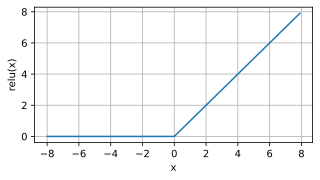

In [2]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad = True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize = (5, 2.5))

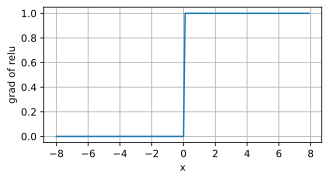

In [3]:
y.backward(torch.ones_like(x), retain_graph = True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize = (5, 2.5))

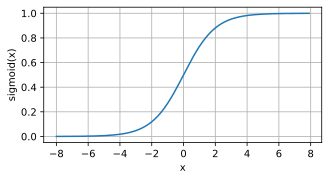

In [4]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize = (5, 2.5))

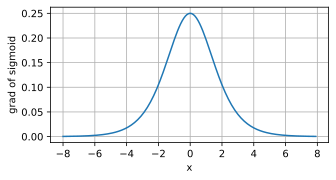

In [5]:
x.grad.data.zero_()
y.backward(torch.ones_like(x), retain_graph = True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize = (5, 2.5))

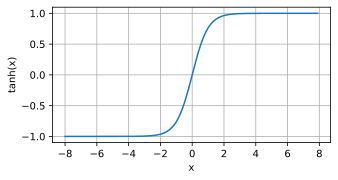

In [6]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize = (5, 2.5))

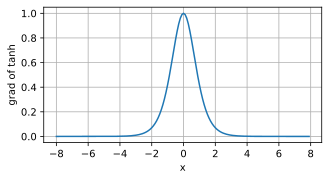

In [7]:
x.grad.data.zero_()
y.backward(torch.ones_like(x), retain_graph = True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize = (5, 2.5))

# 2 - 多层感知机的从零开始实现

In [8]:
from torch import nn

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
train_iter.num_workers = 0
test_iter.num_workers = 0

## 2 - 1 初始化模型参数

In [9]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nn.Parameter(torch.randn(
    num_inputs, num_hiddens, requires_grad = True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad = True))
W2 = nn.Parameter(torch.randn(
    num_hiddens, num_outputs, requires_grad = True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad = True))

params = [W1, b1, W2, b2]

## 2 - 2 激活函数

In [10]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

## 2 - 3 模型

In [11]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(torch.matmul(X, W1) + b1)
    return (torch.matmul(H, W2) + b2)

## 2 - 4 损失函数

In [12]:
loss = nn.CrossEntropyLoss(reduction = 'none')

## 2 - 5 训练

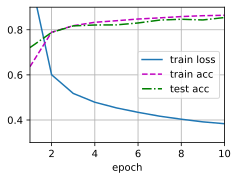

In [13]:
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr = lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

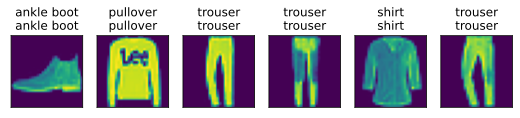

In [14]:
d2l.predict_ch3(net, test_iter)

# 3 - 多层感知机的简洁实现

## 3 - 1 模型

In [15]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std = 0.01)

net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

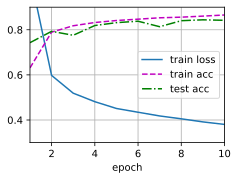

In [16]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction = 'none')
trainer = torch.optim.SGD(net.parameters(), lr = lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
train_iter.num_workers = 0
test_iter.num_workers = 0
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

# 4 - 模型选择、欠拟合和过拟合

## 4 - 1 生成数据集

In [17]:
max_degree = 20 #多项式的最大阶数
n_train, n_test = 100, 100 #训练和测试数据集大小
true_w = np.zeros(max_degree) #分配大量的空间
true_w[0 : 4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size = (n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
for i in range(max_degree):
    poly_features[:, i] / math.gamma(i + 1)
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale = 0.1, size = labels.shape)

true_w, features, poly_features, labels = [torch.tensor(x, dtype = torch.float32)
                                          for x in [true_w, features, poly_features, labels]]
features[: 2], poly_features[: 2, :], labels[: 2]

(tensor([[0.7754],
         [1.2379]]),
 tensor([[1.0000e+00, 7.7535e-01, 6.0117e-01, 4.6612e-01, 3.6141e-01, 2.8022e-01,
          2.1727e-01, 1.6846e-01, 1.3062e-01, 1.0127e-01, 7.8524e-02, 6.0884e-02,
          4.7207e-02, 3.6602e-02, 2.8379e-02, 2.2004e-02, 1.7061e-02, 1.3228e-02,
          1.0257e-02, 7.9525e-03],
         [1.0000e+00, 1.2379e+00, 1.5323e+00, 1.8968e+00, 2.3479e+00, 2.9064e+00,
          3.5977e+00, 4.4535e+00, 5.5128e+00, 6.8240e+00, 8.4472e+00, 1.0456e+01,
          1.2944e+01, 1.6022e+01, 1.9833e+01, 2.4551e+01, 3.0390e+01, 3.7619e+01,
          4.6567e+01, 5.7644e+01]]),
 tensor([ 6.4829, 11.9965]))

## 4 - 2 对模型进行训练和测试

weight [[ 5.011355   1.1987836 -3.407343   5.605541 ]]


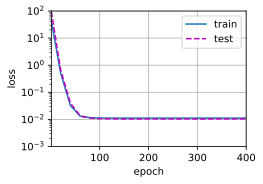

In [18]:
def evaluate_loss(net, data_iter, loss):
    """评估给定数据集上模型的损失"""
    metric = d2l.Accumulator(2)
    for X, y in data_iter:
        l = loss(net(X), y)
        metric.add(l.sum(), d2l.size(l))
    return metric[0] / metric[1]

def train(train_features, test_features, train_labels, test_labels, num_epochs = 400):
    loss = nn.MSELoss(reduction = 'none')
    input_shape = train_features.shape[-1]
    net = nn.Sequential(nn.Linear(input_shape, 1, bias = False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1, 1)), batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1, 1)), batch_size, is_train = False)
    trainer = torch.optim.SGD(net.parameters(), lr = 0.01)
    animator = d2l.Animator(xlabel = 'epoch', ylabel = 'loss', yscale = 'log', xlim = [1, num_epochs], ylim = [1e-3, 1e2], legend = ['train', 'test'])
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss), evaluate_loss(net, test_iter, loss)))
    print('weight', net[0].weight.data.numpy())

train(poly_features[: n_train, : 4], poly_features[n_train :, : 4], labels[: n_train], labels[n_train :])

weight [[ 2.565682 11.430726]]


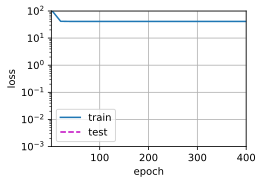

In [19]:
train(poly_features[: n_train, : 2], poly_features[n_train :, : 2], labels[: n_train], labels[n_train :])

weight [[ 4.996167    1.1717464  -3.3382945   5.6581674  -0.03430483 -0.01397478]]


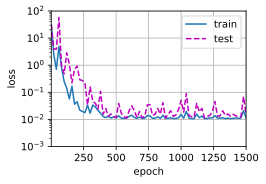

In [23]:
train(poly_features[: n_train, : 6], poly_features[n_train :, : 6], labels[: n_train], labels[n_train :], num_epochs = 1500)
#过多的特征参与训练得不错结果

# 5 - 权重衰减

## 5 - 1 高维线性回归

In [25]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train = False)

## 5 - 2从零开始实现

w的L2范数是： 0.35649797320365906


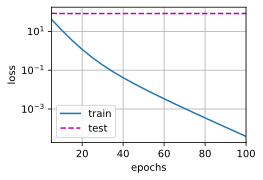

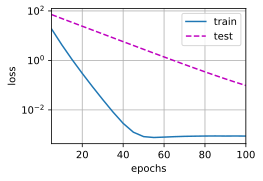

In [33]:
def init_params():
    """初始化模型参数"""
    w = torch.normal(0, 1, size = (num_inputs, 1), requires_grad = True)
    b = torch.zeros(1, requires_grad = True)
    return [w, b]

def l2_penalty(w):
    """L_2范数惩罚"""
    return torch.sum(w.pow(2)) / 2

def train(lambd):
    """训练代码"""
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(
        xlabel = 'epochs', ylabel = 'loss', yscale = 'log', xlim = [5, num_epochs], legend = ['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数是：', torch.norm(w).item())
    
train(lambd = 0)

train(lambd = 3)

## 5 - 3 简洁实现

w的L2范数： 0.3460816740989685


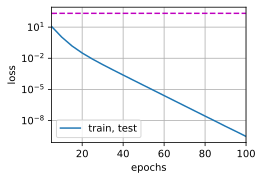

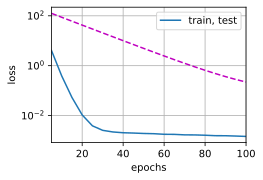

In [36]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss(reduction = 'none')
    num_epochs, lr = 100, 0.003
    trainer = torch.optim.SGD([
        {"params" : net[0].weight, 'weight_decay':wd},
        {"params" : net[0].bias}], lr = lr)
    animator = d2l.Animator(xlabel = 'epochs', ylabel = 'loss', yscale = 'log', 
                            xlim = [5, num_epochs], legend = ['train, ''test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.mean().backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                         d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数：', net[0].weight.norm().item())
    
train_concise(0)

train_concise(3)

## 6 - 暂退法（Dropout）

## 6 - 1 从零开始实现

In [4]:
def dropout_layer(X, dropout):
    """dropout 层"""
    assert 0 <= dropout <= 1
    if dropout == 1:
        return torch.zeros_like(X)
    if dropout == 0:
        return X
    mask = (torch.rand(X.shape) > dropout).float()
    return mask * X / (1.0 - dropout)

X = torch.arange(16, dtype = torch.float32).reshape((2, 8))
print(X)
print(dropout_layer(X, 0.))
print(dropout_layer(X, 0.5))
print(dropout_layer(X, 1.))

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  0.,  4.,  0.,  0., 10.,  0., 14.],
        [ 0., 18., 20.,  0., 24., 26.,  0., 30.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])


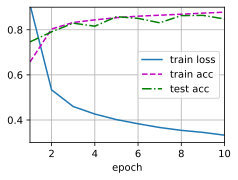

In [6]:
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256

dropout1, dropout2 = 0.2, 0.5

class Net(nn.Module):
    """定义模型"""
    def __init__(self, num_inputs, num_outputs, num_hiddens1, num_hiddens2, is_training = True):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.training = is_training
        self.lin1 = nn.Linear(num_inputs, num_hiddens1)
        self.lin2 = nn.Linear(num_hiddens1, num_hiddens2)
        self.lin3 = nn.Linear(num_hiddens2, num_outputs)
        self.relu = nn.ReLU()
    
    def forward(self, X):
        H1 = self.relu(self.lin1(X.reshape((-1, self.num_inputs))))
        if self.training == True:
            H1 = dropout_layer(H1, dropout1)
        H2 = self.relu(self.lin2(H1))
        if self.training == True:
            H2 = dropout_layer(H2, dropout2)
        out = self.lin3 (H2)
        return out
    
net = Net(num_inputs, num_outputs, num_hiddens1, num_hiddens2)

num_epochs, lr, batch_size = 10, 0.5, 256
loss = nn.CrossEntropyLoss(reduction = 'none')
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
train_iter.num_workers = 0
test_iter.num_workers = 0
trainer = torch.optim.SGD(net.parameters(), lr = lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

## 6 - 2 简洁实现

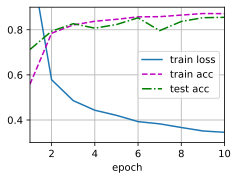

In [9]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Dropout(dropout1),
                    nn.Linear(256, 256),
                    nn.ReLU(),
                    nn.Dropout(dropout2),
                    nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std = 0.01)

net.apply(init_weights)
trainer = torch.optim.SGD(net.parameters(), lr = lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)